In [83]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline
import seaborn as sns

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')

In [84]:
def historical_data(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    return df

In [85]:
VAA = ['MSFT','NFLX','AAPL','FB','TSLA']
Maindf = historical_data("SPY")
Maindf.index = pd.to_datetime(Maindf.timestamp) #set the index as the timestamp
#Maindf.index = pd.to_datetime(Maindf.index) #make the index datetime
Maindf = Maindf[['timestamp','adjusted_close']]
Maindf.columns = ["timestamp","SPY"]

for ticker in VAA:
    temp_df = historical_data(ticker)
    temp_df.index = pd.to_datetime(temp_df.timestamp) #set the index as the timestamp
    temp_df = temp_df[['adjusted_close']]
    temp_df.columns = [ticker]
    Maindf = Maindf.join(temp_df, how = "left")

Maindf.dropna(inplace = True)
Maindf = Maindf.sort_index()


In [86]:
data = Maindf[['SPY','MSFT','NFLX','AAPL','FB','TSLA']]
data = data.ix['2014-01-01':]
perf = data.calc_stats()

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


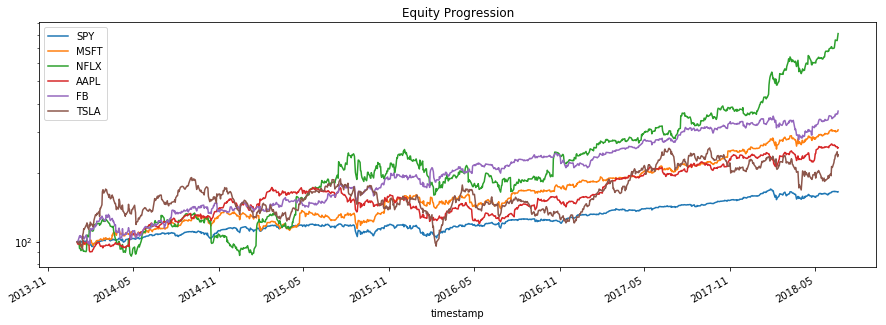

In [87]:
perf.plot(logy = True)

In [131]:
perf.display()

Stat                 SPY         MSFT        NFLX        AAPL        FB          TSLA
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2014-01-02  2014-01-02  2014-01-02  2014-01-02  2014-01-02  2014-01-02
End                  2018-06-20  2018-06-20  2018-06-20  2018-06-20  2018-06-20  2018-06-20
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         65.12%      207.46%     708.02%     156.85%     271.19%     139.48%
Daily Sharpe         0.96        1.24        1.32        1.04        1.19        0.68
Daily Sortino        1.49        2.14        2.39        1.75        2.09        1.16
CAGR                 11.89%      28.62%      59.71%      23.54%      34.16%      21.62%
Max Drawdown         -13.01%     -18.05%     -36.77%     -30.44%     -22.06%     -49.77%
Calmar Ratio         0.91        1.59        1.62        0.77        1.55        0.43

MTD                  2.45

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000118BE550>,
      dtype=object)

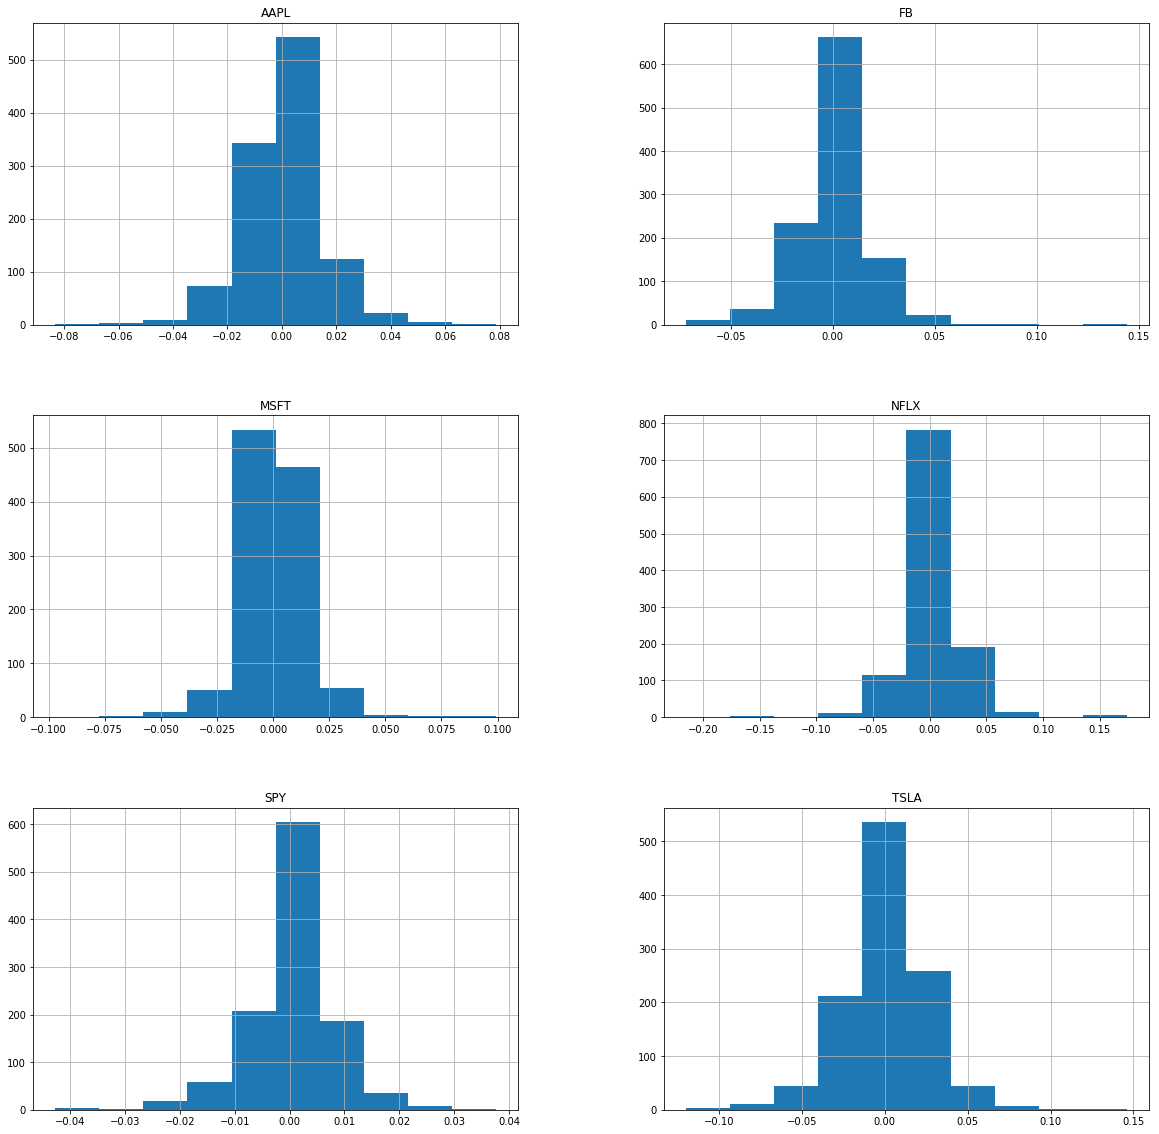

In [89]:
returns = data.to_log_returns().dropna()
returns.hist(figsize =(20,20))

In [90]:
returns.corr().as_format('.2f')

,SPY,MSFT,NFLX,AAPL,FB,TSLA
SPY,1.00,0.69,0.42,0.59,0.56,0.42
MSFT,0.69,1.00,0.34,0.47,0.45,0.31
NFLX,0.42,0.34,1.00,0.28,0.39,0.33
AAPL,0.59,0.47,0.28,1.00,0.39,0.28
FB,0.56,0.45,0.39,0.39,1.00,0.39
TSLA,0.42,0.31,0.33,0.28,0.39,1.00


<module 'matplotlib.pyplot' from 'C:\\Users\\scheng\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

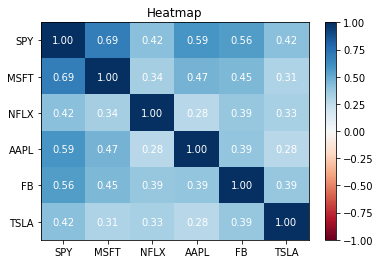

In [91]:
returns.plot_corr_heatmap()

In [92]:
perf['SPY'].display_monthly_returns()


  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2014  -2.59   4.55   0.83   0.7    2.32   2.06  -1.34   3.95  -1.38   2.36   2.75  -0.26  14.56
  2015  -2.96   5.62  -1.57   0.98   1.29  -2.03   2.26  -6.1   -2.54   8.51   0.37  -1.72   1.25
  2016  -4.98  -0.08   6.72   0.39   1.7    0.35   3.65   0.12   0.01  -1.73   3.68   2.03  12
  2017   1.79   3.93   0.13   0.99   1.41   0.64   2.06   0.29   2.01   2.36   3.06   1.21  21.7
  2018   5.64  -3.64  -2.74   0.52   2.43   2.45   0      0      0      0      0      0      4.43


In [93]:
#perf['SPY'].stats

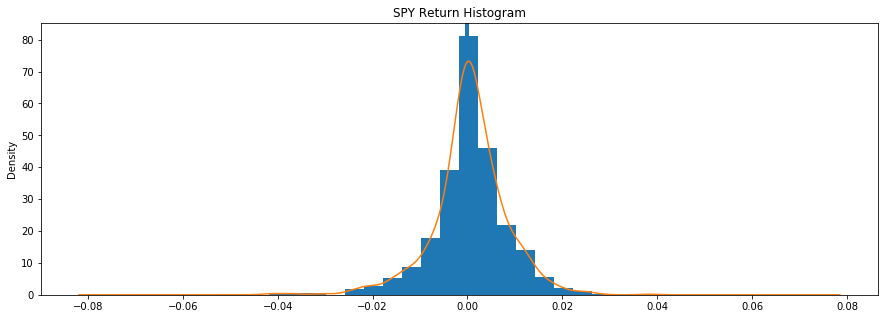

In [94]:
perf[0].plot_histogram()